# Import All Necessary Library

Mengimpor semua library yang dibutuhkan untuk eksplorasi data, visualisasi, pemrosesan teks, pembuatan model rekomendasi, dan evaluasi.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Data Understanding

Mengunggah file kaggle.json yang berisi credential akun Kaggle. File ini dibutuhkan untuk mengakses dan mengunduh dataset langsung dari Kaggle.

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadarsayuan","key":"442631e7cc6fdb5a9f4cd8ce563b7722"}'}

Membuat direktori .kaggle, menyalin file kaggle.json ke dalamnya, dan mengatur permission file agar aman digunakan oleh API Kaggle.

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Menggunakan API Kaggle untuk mengunduh dataset MovieLens dari tautan:
https://www.kaggle.com/datasets/ayushimishra2809/movielens-dataset

In [4]:
!kaggle datasets download -d ayushimishra2809/movielens-dataset

Dataset URL: https://www.kaggle.com/datasets/ayushimishra2809/movielens-dataset
License(s): unknown


Men-unzip file movielens-dataset.zip untuk mengekstrak file movies.csv dan ratings.csv yang akan digunakan dalam proses analisis dan pembuatan sistem rekomendasi.

In [5]:
!unzip movielens-dataset.zip

Archive:  movielens-dataset.zip
  inflating: movies.csv              
  inflating: ratings.csv             


Membaca file movies.csv dan ratings.csv ke dalam DataFrame untuk analisis dan pembuatan sistem rekomendasi.

In [6]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Exploratory Data Analysis

## Movies Variable

Menampilkan informasi struktur DataFrame movies, termasuk jumlah entri, kolom, tipe data, dan penggunaan memori dan juga menampilkan isi DataFrame untuk melihat sampel data film dan genre yang tersedia.

In [7]:
movies.info()
movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


Mengecek jumlah movieId, judul film, dan kombinasi genre yang unik dalam dataset untuk memahami keragaman data film yang tersedia.

In [8]:
print('Jumlah Movie ID yang Unik: ', len(movies.movieId.unique()))
print('Jumlah Judul Movie yang Unik: ', len(movies.title.unique()))
print('Jumlah Kombinasi Genre yang Berbeda: ', len(movies.genres.unique()))

Jumlah Movie ID yang Unik:  10329
Jumlah Judul Movie yang Unik:  10327
Jumlah Kombinasi Genre yang Berbeda:  938


## Ratings Variable

Menampilkan informasi struktur DataFrame ratings, termasuk jumlah entri, kolom, tipe data, dan penggunaan memori dan juga menampilkan isi DataFrame untuk melihat sampel data rating yang diberikan pengguna terhadap film tertentu.

In [9]:
ratings.info()
ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


Menampilkan statistik deskriptif dari dataset ratings, seperti jumlah data, nilai rata-rata, standar deviasi, nilai minimum dan maksimum untuk masing-masing kolom numerik.

In [10]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


Mengecek jumlah userId, movieId, nilai rating, dan timestamp yang unik untuk memahami cakupan dan variasi data rating dalam dataset.

In [11]:
print('Jumlah User ID yang Unik: ', len(ratings.userId.unique()))
print('Jumlah Movie ID yang Unik: ', len(ratings.movieId.unique()))
print('Jumlah Pilihan Rating: ', len(ratings.rating.unique()))
print('Jumlah Timestamp: ', len(ratings.timestamp.unique()))

Jumlah User ID yang Unik:  668
Jumlah Movie ID yang Unik:  10325
Jumlah Pilihan Rating:  10
Jumlah Timestamp:  84686


Membuat visualisasi distribusi rating dalam dataset menggunakan countplot untuk melihat seberapa sering masing-masing nilai rating diberikan oleh pengguna.

<ipython-input-12-729874aaa9bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='RdYlGn')


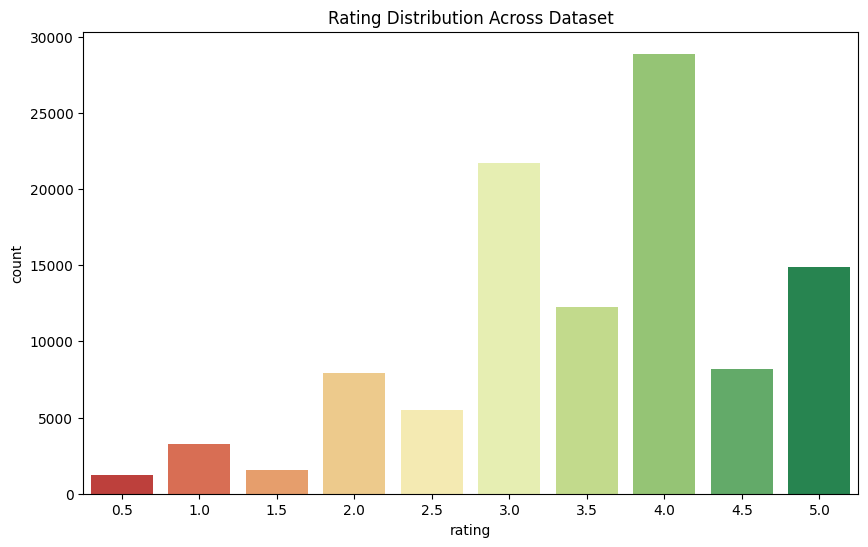

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings, palette='RdYlGn')
plt.title('Rating Distribution Across Dataset')
plt.show()

# Data Preprocessing

Menyalin dataset movies dan ratings ke variabel baru (prep_movies dan prep_ratings) sebagai salinan kerja untuk proses prapemrosesan tanpa mengubah data asli.

In [13]:
# Salin dan Siapkan Dataset
prep_movies = movies.copy()
prep_ratings = ratings.copy()

Memformat kolom genres dengan mengganti karakter pemisah "|" menjadi spasi untuk memudahkan pemrosesan lebih lanjut. Kolom hasilnya disimpan dalam kolom baru genres_clean.

In [14]:
# Format Genre
prep_movies['genres_clean'] = prep_movies['genres'].apply(lambda x: x.replace('|', ' '))

Membuat matriks TF-IDF dari kolom genres_clean untuk menghitung representasi numerik genre film menggunakan TfidfVectorizer, mengabaikan kata-kata umum (stop words) dalam bahasa Inggris. Matriks hasilnya disimpan dalam tfidf_matrix.

In [15]:
# TF-IDF Matrix dari Genre
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(prep_movies['genres_clean'])

print('TF-IDF Matrix Shape:', tfidf_matrix.shape)

TF-IDF Matrix Shape: (10329, 23)


Menggabungkan dataset prep_ratings dan prep_movies berdasarkan kolom movieId untuk menghasilkan DataFrame yang berisi informasi rating beserta detail film yang relevan.

In [16]:
# Merge Movie & Rating
merged_df = pd.merge(prep_ratings, prep_movies, on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_clean
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,Crime Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi,Drama Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,Mystery Sci-Fi Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,Mystery Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,Crime Mystery Thriller


Membuat matriks User-Item dengan pivot_table, di mana baris mewakili userId, kolom mewakili movieId, dan nilai adalah rating yang diberikan oleh pengguna terhadap film tersebut.

In [17]:
# User-Item Matrix
user_item_matrix = merged_df.pivot_table(index='userId', columns='movieId', values='rating')

# Data Preparation

Memeriksa jumlah nilai yang hilang (missing values) pada dataset movies dan ratings untuk memastikan data lengkap sebelum dilakukan analisis lebih lanjut.

In [18]:
# Cek Missing Value
print(movies.isnull().sum())
print(ratings.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


Membagi dataset ratings menjadi data latih (train_data) dan data uji (test_data) dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian, menggunakan train_test_split.

In [19]:
# Split Data
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (84271, 4)
Test: (21068, 4)


Mengonversi userId dan movieId menjadi indeks numerik untuk mempermudah pemrosesan model. Mapping dilakukan dengan membuat dictionary user_to_index dan movie_to_index, dan hasilnya disimpan dalam kolom baru user_idx dan movie_idx pada dataset ratings, train_data, dan test_data.

In [20]:
# Encode User ID dan Movie ID
user_ids = ratings['userId'].unique()
movie_ids = ratings['movieId'].unique()

user_to_index = {uid: idx for idx, uid in enumerate(user_ids)}
movie_to_index = {mid: idx for idx, mid in enumerate(movie_ids)}

ratings['user_idx'] = ratings['userId'].map(user_to_index)
ratings['movie_idx'] = ratings['movieId'].map(movie_to_index)

train_data['user_idx'] = train_data['userId'].map(user_to_index)
train_data['movie_idx'] = train_data['movieId'].map(movie_to_index)

test_data['user_idx'] = test_data['userId'].map(user_to_index)
test_data['movie_idx'] = test_data['movieId'].map(movie_to_index)

Membuat matriks User-Item untuk data latih (train_data) dengan pivot_table, di mana baris mewakili user_idx, kolom mewakili movie_idx, dan nilai adalah rating. Nilai yang hilang (NaN) diisi dengan 0 menggunakan fillna(0) untuk mempersiapkan data bagi model.

In [21]:
# Buat User-Item Matrix
user_item_matrix = train_data.pivot_table(index='user_idx', columns='movie_idx', values='rating')
user_item_filled = user_item_matrix.fillna(0)

# Model Development w/ Content-Based Filtering

## Cosine Similiarity

Menghitung kemiripan kosinus (cosine similarity) antara semua film berdasarkan matriks TF-IDF tfidf_matrix. Hasilnya disimpan dalam cosine_sim_df, yang mempermudah pencarian kemiripan antar film menggunakan judul film sebagai indeks dan kolom.

In [22]:
# Hitung cosine similarity antar semua film
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# DataFrame untuk mempermudah indexing pakai judul film
cosine_sim_df = pd.DataFrame(cosine_sim, index=prep_movies['title'], columns=prep_movies['title'])

# Cek sebagian matrix
print('Cosine Sim Matrix Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Cosine Sim Matrix Shape: (10329, 10329)


title,Good Work (Beau travail) (1999),Shivers (They Came from Within) (1975),Shallow Hal (2001),"Brothers Grimm, The (2005)",Fall Time (1995)
title,,,,,
Winter in Wartime (Oorlogswinter) (2008),0.386036,0.105043,0.000000,0.000000,0.386036
"Day of the Doctor, The (2013)",0.275671,0.718671,0.000000,0.000000,0.275671
"Secret Life of Walter Mitty, The (2013)",0.404778,0.110143,0.204323,0.173394,0.404778
B*A*P*S (1997),0.000000,0.000000,0.408726,0.346856,0.000000
Vengeance Valley (1951),0.000000,0.000000,0.000000,0.000000,0.000000
Full Tilt Boogie (1997),0.000000,0.000000,0.000000,0.000000,0.000000
"Brothers Karamazov, The (1958)",1.000000,0.272107,0.000000,0.000000,1.000000
All Over the Guy (2001),0.000000,0.000000,0.408726,0.346856,0.000000
Dear God (1996),0.000000,0.000000,0.408726,0.346856,0.000000


## Recommendation Function

Mendefinisikan fungsi movie_recommendations() untuk memberikan rekomendasi film berdasarkan kemiripan genre menggunakan cosine similarity. Fungsi ini mengambil judul film sebagai input dan mengembalikan daftar film paling mirip (k rekomendasi) berdasarkan genre.

In [23]:
def movie_recommendations(nama_film, similarity_data=cosine_sim_df, items=prep_movies[['title', 'genres']], k=5):
    """
    Mengembalikan rekomendasi film berdasarkan genre yang mirip

    Parameters:
    - nama_film: judul film (str)
    - similarity_data: cosine similarity dataframe
    - items: dataframe berisi film dan genre
    - k: jumlah rekomendasi (int)
    """

    # Urutkan berdasarkan similarity tertinggi (tanpa memasukkan film itu sendiri)
    index = similarity_data.loc[:, nama_film].to_numpy().argpartition(
        range(-1, -k-1, -1)
    )

    # Ambil k film dengan similarity tertinggi
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Hilangkan film asal dari daftar rekomendasi
    closest = closest.drop(nama_film, errors='ignore')

    # Jadikan DataFrame dengan nama kolom agar bisa di-merge
    closest_df = pd.DataFrame(closest, columns=['title'])

    # Merge dengan data film
    return closest_df.merge(items, on='title').head(k)

Menampilkan contoh hasil rekomendasi film berdasarkan kemiripan genre untuk sebuah film menggunakan fungsi movie_recommendations().

In [24]:
# Contoh rekomendasi berdasarkan genre mirip
movie_recommendations('Green Street Hooligans (a.k.a. Hooligans) (2005)')

,title,genres
0,Capote (2005),Crime|Drama
1,City by the Sea (2002),Crime|Drama
2,Mean Streets (1973),Crime|Drama
3,Rush (1991),Crime|Drama
4,No Country for Old Men (2007),Crime|Drama


# Model Development w/ Collaborative Filtering

## Encode User and Movie

Melakukan encoding userId dan movieId menjadi indeks numerik menggunakan dictionary (user_to_encoded, movie_to_encoded) untuk kebutuhan input model, serta menyediakan mapping balik dengan encoded_to_user dan encoded_to_movie.

In [25]:
# Encode userId dan movieId menjadi indeks
user_ids = ratings['userId'].unique().tolist()
user_to_encoded = {x: i for i, x in enumerate(user_ids)}
encoded_to_user = {i: x for x, i in user_to_encoded.items()}

movie_ids = ratings['movieId'].unique().tolist()
movie_to_encoded = {x: i for i, x in enumerate(movie_ids)}
encoded_to_movie = {i: x for x, i in movie_to_encoded.items()}

Menambahkan kolom user dan movie pada DataFrame ratings yang berisi hasil mapping userId dan movieId ke indeks numerik hasil encoding sebelumnya, untuk digunakan dalam pelatihan model.

In [26]:
# Mapping ID asli ke encoding di DataFrame
ratings['user'] = ratings['userId'].map(user_to_encoded)
ratings['movie'] = ratings['movieId'].map(movie_to_encoded)

## Variable Preparation

Mengonversi kolom rating ke tipe data float32 serta melakukan normalisasi rating menggunakan min-max scaling agar nilai berada dalam rentang 0–1, serta memisahkan fitur (x) dan target (y) untuk pelatihan model.

In [27]:
# Konversi rating ke float
ratings['rating'] = ratings['rating'].astype(np.float32)

# Skala rating (min-max normalization)
min_rating = ratings['rating'].min()
max_rating = ratings['rating'].max()

x = ratings[['user', 'movie']].values
y = ratings['rating'].apply(lambda r: (r - min_rating) / (max_rating - min_rating)).values

## Split Data

Mengacak data ratings agar distribusi data lebih merata, kemudian embagi data menjadi data latih dan validasi dengan rasio 80:20. Lalu, menentukan jumlah unik pengguna (num_users) dan film (num_movies) untuk digunakan dalam arsitektur model.

In [28]:
# Acak data
ratings = ratings.sample(frac=1, random_state=42)

# Split 80:20
train_size = int(0.8 * len(x))
x_train, x_val = x[:train_size], x[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Dapatkan jumlah user dan movie
num_users = len(user_to_encoded)
num_movies = len(movie_to_encoded)

## Build Model

Mendefinisikan kelas model rekomendasi RecommenderNet berbasis TensorFlow Keras. Model ini menggunakan embedding untuk merepresentasikan pengguna dan film dalam ruang vektor laten, termasuk bias dan dropout untuk regularisasi. Output dihitung dengan operasi dot product antara embedding pengguna dan film, lalu ditambahkan bias, dan diaktifkan dengan fungsi sigmoid.

In [29]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size

        # Embedding user
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-4)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        # Embedding movie
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-4)
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

        # Dropout tambahan
        self.dropout = layers.Dropout(0.3)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])

        # Dropout di kedua embedding
        user_vector = self.dropout(user_vector)
        movie_vector = self.dropout(movie_vector)

        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        x = dot_user_movie + user_bias + movie_bias
        return tf.nn.sigmoid(x)

Membuat instance model RecommenderNet dengan ukuran embedding 50. Lalu, meng-compile model menggunakan loss BinaryCrossentropy, optimizer Adam, dan metrik RootMeanSquaredError serta melatih model selama 15 epoch dengan batch size 16, menggunakan data latih dan validasi yang telah dipisahkan sebelumnya.

In [30]:
model = RecommenderNet(num_users, num_movies, embedding_size=50)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Training lebih pendek dan batch lebih besar
history = model.fit(
    x_train,
    y_train,
    batch_size=16,
    epochs=15,
    validation_data=(x_val, y_val)
)

Epoch 1/15
5267/5267 ━━━━━━━━━━━━━━━━━━━━ 49s 9ms/step - loss: 0.6512 - root_mean_squared_error: 0.2434 - val_loss: 0.6828 - val_root_mean_squared_error: 0.2627
Epoch 2/15
5267/5267 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - loss: 0.6090 - root_mean_squared_error: 0.2009 - val_loss: 0.6708 - val_root_mean_squared_error: 0.2530
Epoch 3/15
5267/5267 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - loss: 0.5995 - root_mean_squared_error: 0.1927 - val_loss: 0.6621 - val_root_mean_squared_error: 0.2465
Epoch 4/15
5267/5267 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - loss: 0.5938 - root_mean_squared_error: 0.1883 - val_loss: 0.6562 - val_root_mean_squared_error: 0.2420
Epoch 5/15
5267/5267 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - loss: 0.5907 - root_mean_squared_error: 0.1858 - val_loss: 0.6515 - val_root_mean_squared_error: 0.2385
Epoch 6/15
5267/5267 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - loss: 0.5873 - root_mean_squared_error: 0.1828 - val_loss: 0.6482 - val_root_mean_squared_error: 0.2361
Epoch 7/15
5267/5267 ━━━━━━━━━━━━━

## Metric Visualization

Memvisualisasikan performa model selama pelatihan dengan menampilkan grafik RMSE (Root Mean Squared Error) pada data latih dan validasi di setiap epoch, untuk memantau overfitting atau peningkatan performa model.

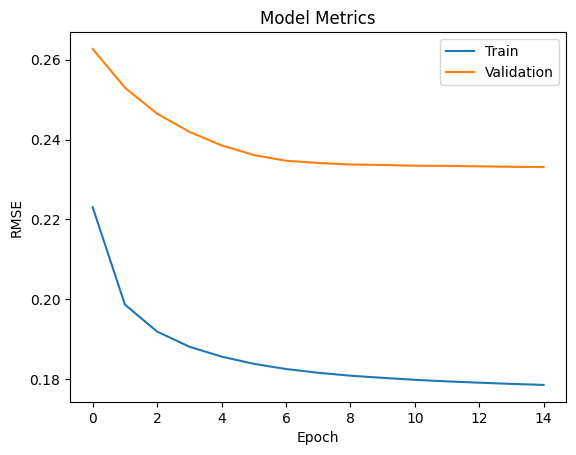

In [31]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Model Metrics')
plt.legend(['Train', 'Validation'])
plt.show()

## Get Recommendation

Memilih pengguna secara acak dan menemukan film yang sudah dan belum ditonton oleh pengguna tersebut. Kemudian menghitung prediksi rating untuk film yang belum ditonton dengan model rekomendasi, lalu menampilkan 10 film dengan rating tertinggi sebagai rekomendasi untuk pengguna tersebut.

In [32]:
# Pilih user secara acak
user_id = ratings['userId'].sample(1).iloc[0]
movies_watched = ratings[ratings['userId'] == user_id]['movieId'].tolist()

# Movie yang belum ditonton
movies_not_watched = [m for m in movie_ids if m not in movies_watched]
movies_not_watched_encoded = [movie_to_encoded[m] for m in movies_not_watched]
user_encoded = user_to_encoded[user_id]

# Buat array prediksi
user_movie_array = np.hstack((
    np.array([[user_encoded]] * len(movies_not_watched_encoded)),
    np.array(movies_not_watched_encoded).reshape(-1, 1)
))

# Prediksi rating dan ambil top 10
pred_ratings = model.predict(user_movie_array).flatten()
top_indices = pred_ratings.argsort()[-10:][::-1]
top_movie_ids = [encoded_to_movie[i] for i in [movies_not_watched_encoded[i] for i in top_indices]]

# Tampilkan hasil
recommended = movies[movies['movieId'].isin(top_movie_ids)]

# Tampilkan user yang dipilih secara acak
print(f"Rekomendasi untuk User ID: {user_id}")
recommended[['title', 'genres']]

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Rekomendasi untuk User ID: 573


,title,genres
744,Citizen Kane (1941),Drama|Mystery
938,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
943,Paths of Glory (1957),Drama|War
1007,Touch of Evil (1958),Crime|Film-Noir|Thriller
2398,Princess Mononoke (Mononoke-hime) (1997),Action|Adventure|Animation|Drama|Fantasy
8045,Dr. Horrible's Sing-Along Blog (2008),Comedy|Drama|Musical|Sci-Fi
8545,Cosmos (1980),Documentary
8962,Louis C.K.: Shameless (2007),Comedy
9268,Intouchables (2011),Comedy|Drama
9342,Black Mirror (2011),Drama|Sci-Fi


# Top-N Recommendation

Menghitung rata-rata rating (average_rating) dan jumlah rating (rating_count) untuk setiap film dengan menggunakan groupby. Kemudian menggabungkan hasil statistik tersebut dengan informasi judul film dari dataset prep_movies untuk mempermudah interpretasi.

In [33]:
# Hitung rata-rata rating dan jumlah rating untuk setiap film
movie_stats = prep_ratings.groupby('movieId').agg({
    'rating': ['mean', 'count']
})

# Rename kolom agar mudah digunakan
movie_stats.columns = ['average_rating', 'rating_count']
movie_stats = movie_stats.reset_index()

# Gabungkan dengan info judul film
movie_stats = pd.merge(movie_stats, prep_movies[['movieId', 'title']], on='movieId')
movie_stats.head()

,movieId,average_rating,rating_count,title
0,1,3.907328,232,Toy Story (1995)
1,2,3.353261,92,Jumanji (1995)
2,3,3.189655,58,Grumpier Old Men (1995)
3,4,2.818182,11,Waiting to Exhale (1995)
4,5,3.250000,62,Father of the Bride Part II (1995)


Mendefinisikan fungsi top_n_movies() untuk mengambil N film dengan rata-rata rating tertinggi, dengan syarat jumlah rating minimal tertentu. Fungsi ini menerima parameter data (DataFrame statistik film), n (jumlah film yang ingin ditampilkan), dan min_ratings (batas minimal jumlah reviewer). Fungsi ini mengembalikan DataFrame yang berisi judul, rata-rata rating, dan jumlah rating dari film-film teratas.

In [34]:
def top_n_movies(data, n=10, min_ratings=50):
    """
    Mengambil N film dengan rata-rata rating tertinggi dan minimal jumlah rating tertentu

    Parameters:
    - data: DataFrame hasil agregasi rating
    - n: jumlah film yang ingin ditampilkan
    - min_ratings: batas minimal jumlah reviewer

    Return: DataFrame Top-N Movies
    """
    filtered = data[data['rating_count'] >= min_ratings]
    top_n = filtered.sort_values(by='average_rating', ascending=False).head(n)
    return top_n[['title', 'average_rating', 'rating_count']]

Menampilkan 10 film teratas dengan minimal 100 reviewer menggunakan fungsi top_n_movies(). Hasilnya mencakup judul film, rata-rata rating, dan jumlah rating.

In [35]:
# Lihat 10 film teratas dengan minimal 100 reviewer
top_n_movies(movie_stats, n=10, min_ratings=100)

,title,average_rating,rating_count
279,"Shawshank Redemption, The (1994)",4.454545,308
695,"Godfather, The (1972)",4.392857,210
47,"Usual Suspects, The (1995)",4.328947,228
922,Monty Python and the Holy Grail (1975),4.301948,154
471,Schindler's List (1993),4.296371,248
956,One Flew Over the Cuckoo's Nest (1975),4.272727,143
537,Fargo (1996),4.271144,201
2056,"Matrix, The (1999)",4.264368,261
982,"Godfather: Part II, The (1974)",4.260714,140
974,Goodfellas (1990),4.259259,135
